In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.impute import SimpleImputer            # for handling missing values

In [22]:
sns.set()

In [4]:
# loading the dataset
data = pd.read_csv("Stock Price Prediction/SBIN.csv")

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,02-01-1996,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,03-01-1996,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,04-01-1996,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,05-01-1996,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0


In [6]:
data.shape

(7074, 7)

In [7]:
data.info()             # basic information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7074 non-null   object 
 1   Open       7065 non-null   float64
 2   High       7065 non-null   float64
 3   Low        7065 non-null   float64
 4   Close      7065 non-null   float64
 5   Adj Close  7065 non-null   float64
 6   Volume     7065 non-null   float64
dtypes: float64(6), object(1)
memory usage: 387.0+ KB


In [8]:
data.describe()         # basic description of data

,Open,High,Low,Close,Adj Close,Volume
count,7065.000000,7065.000000,7065.000000,7065.000000,7065.000000,7.065000e+03
mean,180.682841,183.085167,177.998209,180.448294,166.021712,3.130217e+07
std,154.773229,156.345078,152.980516,154.630549,152.903249,3.462744e+07
min,13.478195,13.935802,13.214009,13.346102,9.531410,0.000000e+00
25%,28.423565,28.824560,28.022570,28.456589,19.854374,1.299123e+07
50%,173.100006,176.500000,170.250000,172.925003,152.411270,2.064292e+07
75%,265.500000,268.899994,261.299988,265.174988,245.764954,3.651478e+07
max,703.650024,728.349976,694.200012,725.250000,725.250000,4.469483e+08


In [9]:
data.isnull().sum()     # checking for null values

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

### Handling Missing values

In [10]:
imputer = SimpleImputer(strategy='mean')
columns_to_impute = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
data[columns_to_impute] = pd.DataFrame(imputer.fit_transform(data[columns_to_impute]), columns=columns_to_impute)

### Adding Indicators

##### SMA

In [11]:
data["SMA_10"] = data['Close'].rolling(window=10).mean()
data["SMA_50"] = data['Close'].rolling(window=50).mean()

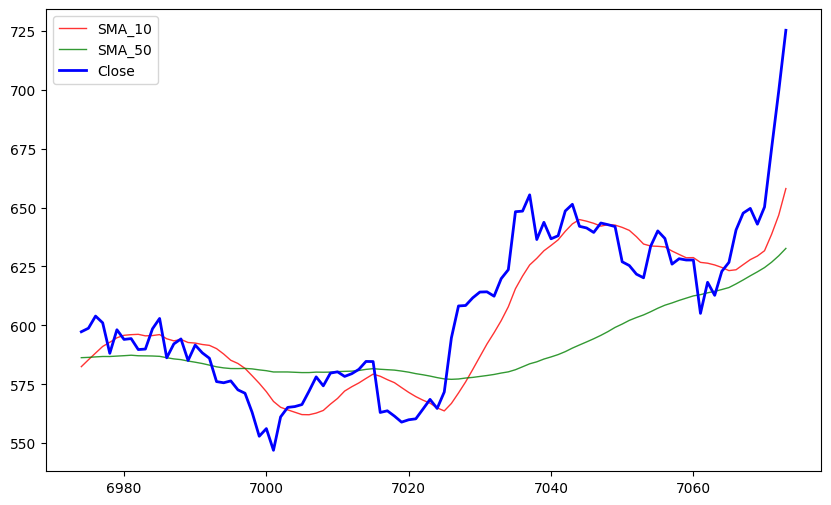

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# days = int(input("Of how many last days you want to see graph with SMA"))
days = 100

ax1.plot(data["SMA_10"][-days:], label = "SMA_10", color='Red', linewidth=1, alpha=0.8)
ax1.plot(data["SMA_50"][-days:], label = "SMA_50", color='Green', linewidth=1, alpha=0.8)
ax1.plot(data["Close"][-days:], label = "Close", color='Blue', linewidth=2)

plt.legend()
plt.show()

##### RSI

In [13]:
delta = data["Close"].diff(1)

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

data['RSI'] = rsi

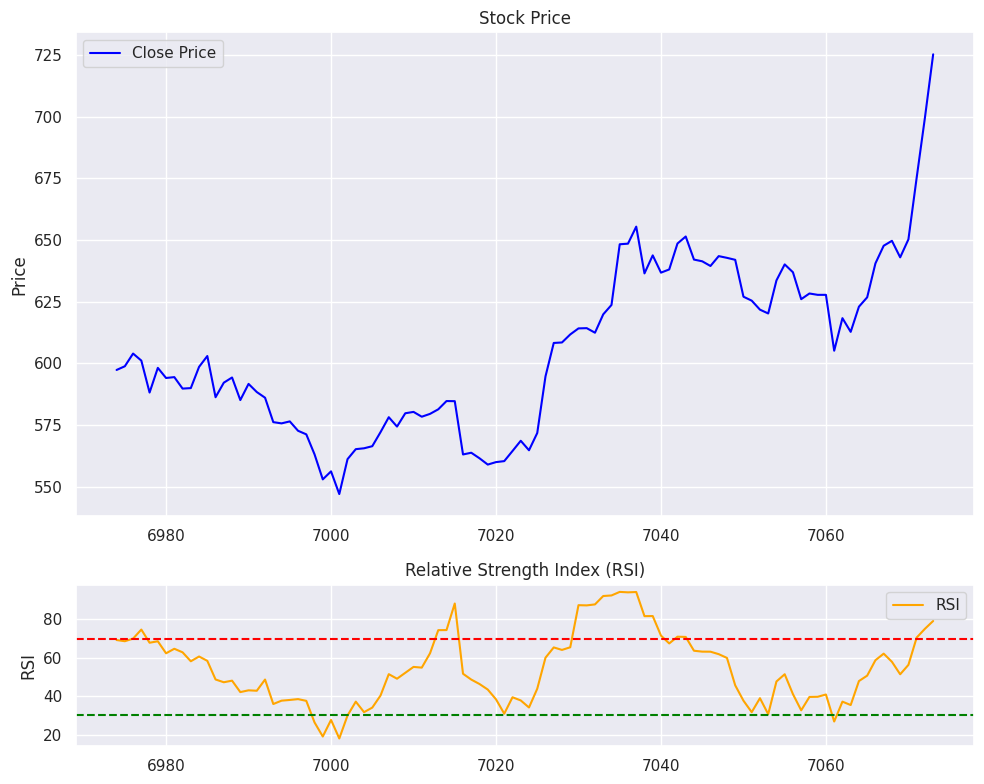

In [24]:
# Create subplots
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), gridspec_kw={'height_ratios': [3, 1]})

# days = int(input("Of how many last days you want to see graph with RSI: "))
days=100

# Plot stock price (Close)
ax1.plot(data['Close'][-days:], label='Close Price', color='blue')
ax1.set_title('Stock Price')
ax1.set_ylabel('Price')
ax1.legend()

# Plot RSI
ax2.plot(data['RSI'][-days:], label='RSI', color='orange')
ax2.axhline(70, color='red', linestyle='--')  # Overbought line
ax2.axhline(30, color='green', linestyle='--')  # Oversold line
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()


##### MACD

In [15]:
# Calculate the short-term and long-term EMAs
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD and Signal line
data['MACD'] = data['EMA_12'] - data['EMA_26']  # MACD line
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()  # Signal line

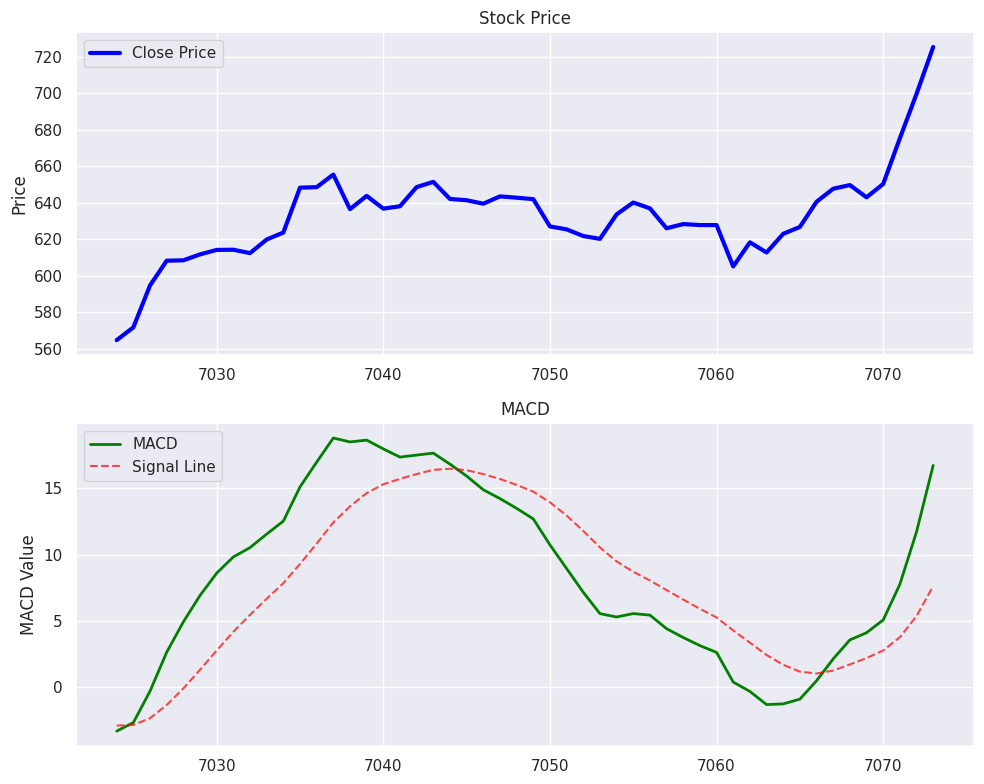

In [25]:

# Plot the stock price, RSI, and MACD
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# days = int(input("Of how many last days you want to see graph with MACD"))
days = 50

# Plot stock price on first subplot (bold)
ax[0].plot( data['Close'][-days:], label='Close Price', color='blue', linewidth=3)
ax[0].set_title('Stock Price')
ax[0].set_ylabel('Price')

# Plot MACD and Signal line on second subplot
ax[1].plot( data['MACD'][-days:], label='MACD', color='green', linewidth=2)
ax[1].plot( data['Signal_Line'][-days:], label='Signal Line', color='red', linestyle='--', alpha=0.7)
ax[1].set_title('MACD')
ax[1].set_ylabel('MACD Value')

# Show legends
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()


In [17]:
data.dropna(subset=["RSI", "SMA_10", "SMA_50", "EMA_12", "EMA_26", "MACD", "Signal_Line"], inplace=True)

In [18]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_50,RSI,EMA_12,EMA_26,MACD,Signal_Line
49,08-03-1996,22.649218,22.734135,22.276527,22.635065,14.923021,39637704.0,23.102579,20.537146,46.208283,22.865484,22.303966,0.561518,0.782961
50,11-03-1996,22.172739,22.361443,21.837790,22.116129,14.580890,39109363.0,22.929443,20.603004,48.257665,22.750199,22.290052,0.460147,0.718398
51,12-03-1996,22.092541,22.186892,21.889683,22.083105,14.559122,27429706.0,22.757250,20.680184,47.903565,22.647569,22.274723,0.372846,0.649288
52,13-03-1996,22.073669,22.686958,21.960447,22.611477,14.907472,27421227.0,22.635065,20.777649,46.844938,22.642016,22.299668,0.342349,0.587900
53,14-03-1996,22.691675,22.889814,22.465231,22.587889,14.891924,36343129.0,22.626573,20.875870,42.165896,22.633689,22.321017,0.312672,0.532854


In [19]:
data.shape

(7025, 14)

In [20]:
data.drop(["Date"],axis=1, inplace=True)

##### Correlatioon

In [21]:
corr = data.corr()

<Axes: >

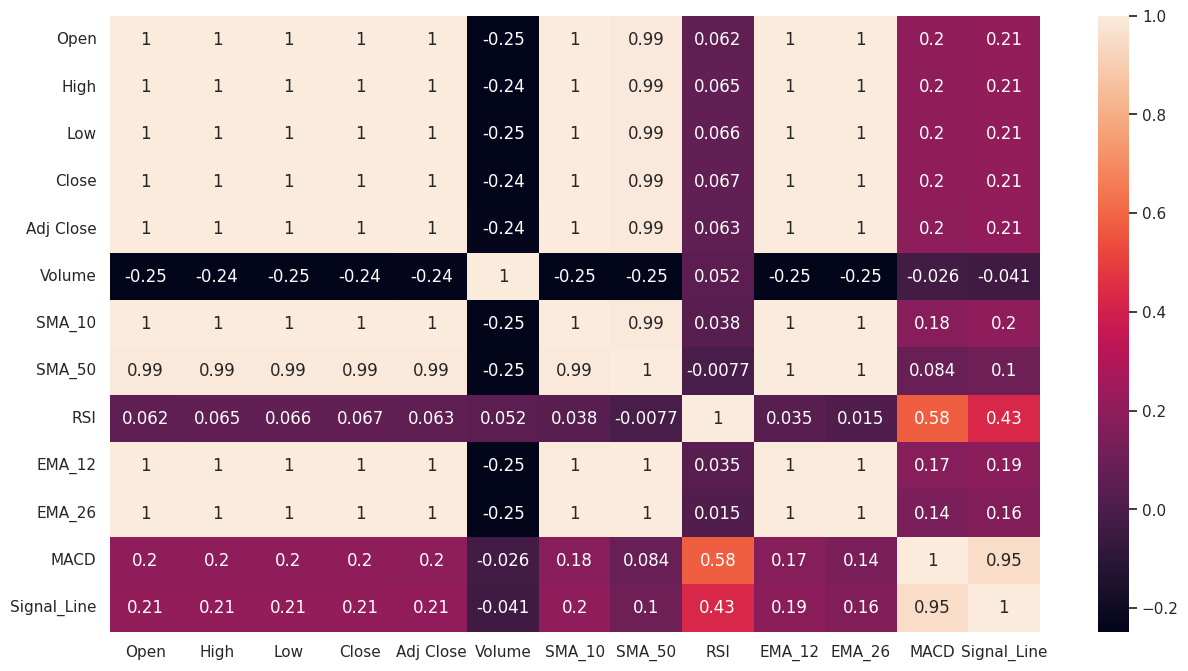

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)